# First we are going to create some test data of object detection moving in 2d space

It will start on the right side of a 256x256 screen and move towards the center with varying velocities

We will then use a kalman filter to track the object's position and velocity

Finally, we will plot the actual and predicted positions to see how well the kalman filter did

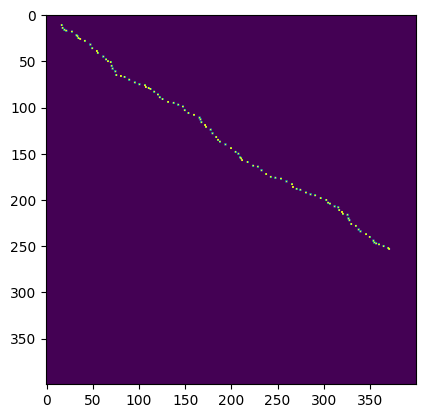

In [1]:
import object_tracking.kalman_filter.fake_data as fake_data
import numpy as np
import matplotlib.pyplot as plt
all_boxes = fake_data.generate_fake_data()

frame = np.zeros((400, 400))

def plot_trajectory(frame: np.ndarray, all_boxes: list, intensity: int = 1):
    """Plots the traject of cx, cy, w, h on a 256x256 frame"""
    for box in all_boxes:
        frame[box[1]:box[1]+box[3], box[0]:box[0]+box[2]] = intensity
    plt.imshow(frame)
    plt.show()
    return frame
    
initial_frame = plot_trajectory(frame, all_boxes)

[[16, 11, 1, 1], [16, 13, 1, 1], [18, 15, 1, 1], [20, 17, 1, 1], [26, 18, 1, 1], [31, 21, 1, 1], [33, 23, 1, 1], [34, 24, 1, 1], [35, 26, 1, 1], [40, 27, 1, 1], [46, 31, 1, 1], [49, 35, 1, 1], [53, 39, 1, 1], [55, 41, 1, 1], [60, 44, 1, 1], [64, 48, 1, 1], [66, 50, 1, 1], [68, 51, 1, 1], [70, 54, 1, 1], [71, 58, 1, 1], [73, 61, 1, 1], [75, 64, 1, 1], [79, 66, 1, 1], [84, 67, 1, 1], [88, 69, 1, 1], [94, 72, 1, 1], [100, 75, 1, 1], [105, 76, 1, 1], [107, 77, 1, 1], [109, 79, 1, 1], [112, 80, 1, 1], [115, 82, 1, 1], [119, 85, 1, 1], [122, 89, 1, 1], [124, 91, 1, 1], [130, 93, 1, 1], [136, 95, 1, 1], [142, 96, 1, 1], [147, 98, 1, 1], [149, 102, 1, 1], [152, 106, 1, 1], [158, 108, 1, 1], [164, 110, 1, 1], [166, 113, 1, 1], [167, 115, 1, 1], [170, 118, 1, 1], [172, 121, 1, 1], [176, 123, 1, 1], [179, 127, 1, 1], [182, 131, 1, 1], [185, 135, 1, 1], [187, 137, 1, 1], [192, 139, 1, 1], [198, 143, 1, 1], [204, 147, 1, 1], [207, 150, 1, 1], [209, 153, 1, 1], [210, 155, 1, 1], [211, 156, 1, 1], [2

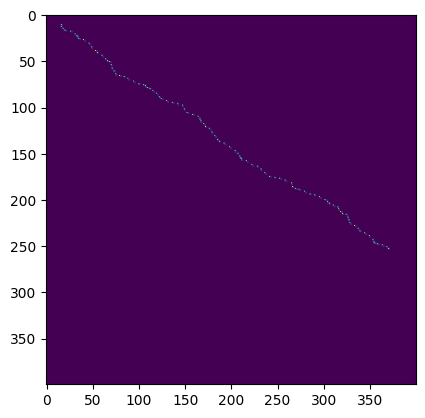

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [2]:
from object_tracking.kalman_filter.schema_1d import KalmanStateVector1D, Kalman1DTracker

state_x = KalmanStateVector1D(x=all_boxes[0][0], vx=0)
state_y = KalmanStateVector1D(x=all_boxes[0][1], vx=0)
tracker_x = Kalman1DTracker(state_x, state_noise_std=.01, measurement_noise_std=.01)
tracker_y = Kalman1DTracker(state_y, state_noise_std=.01, measurement_noise_std=.01)

states = []
for box in all_boxes:
    tracker_x.update(box[0], dt=1)
    tracker_y.update(box[1], dt=1)
    states.append([int(tracker_x.state.x), int(tracker_y.state.x), 1, 1])

frame = np.zeros((512, 512))
print(states)
plot_trajectory(initial_frame, states, intensity=10)